 Preprocessing the Signal

In [2]:
import numpy as np
import scipy.signal as signal

# Generate or import your signal data
# Here we're simulating it
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)
signal_data = np.sin(2 * np.pi * 5 * t) + 0.1 * np.random.normal(size=fs)  # A noisy sine wave

# Smoothing with a moving average
window_size = 10
smoothed_signal = np.convolve(signal_data, np.ones(window_size)/window_size, mode='same')


Detecting Frequency Anomalies with Fourier Transform

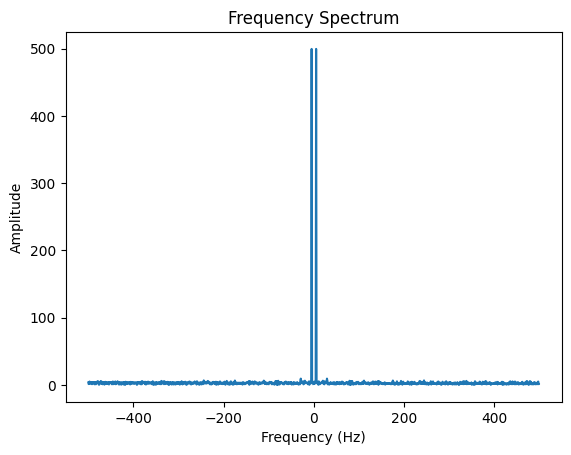

In [3]:
import matplotlib.pyplot as plt

# Perform Fourier Transform
freqs = np.fft.fftfreq(len(signal_data), 1/fs)
fft_values = np.abs(np.fft.fft(signal_data))

# Plot the frequency domain representation
plt.plot(freqs, fft_values)
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()


Step 3: Detecting Amplitude Anomalies

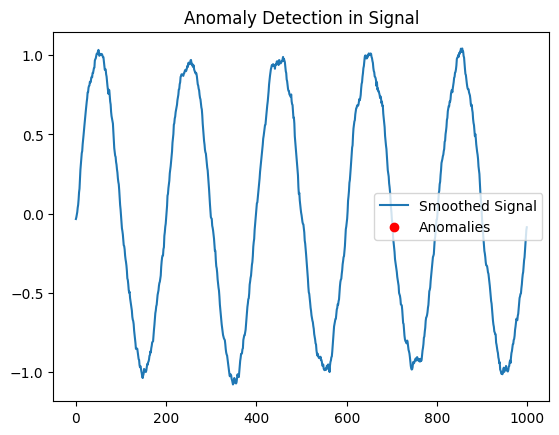

In [4]:
# Calculate mean and standard deviation
mean = np.mean(smoothed_signal)
std = np.std(smoothed_signal)

# Define an anomaly as any point > 3 standard deviations from the mean
anomaly_threshold = 3
z_scores = (smoothed_signal - mean) / std
anomalies = np.where(np.abs(z_scores) > anomaly_threshold)[0]

# Plot the signal with anomalies
plt.plot(smoothed_signal, label="Smoothed Signal")
plt.scatter(anomalies, smoothed_signal[anomalies], color='red', label="Anomalies")
plt.title("Anomaly Detection in Signal")
plt.legend()
plt.show()


Step 4: Detecting Time-Series Patterns with Rolling Statistics

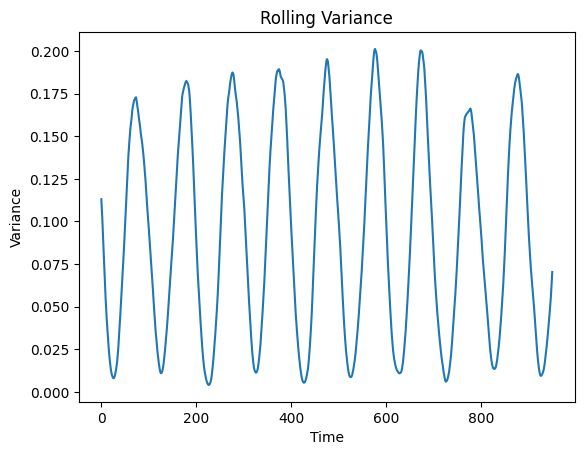

In [5]:
window = 50  # Size of the rolling window
variance = np.var([smoothed_signal[i:i+window] for i in range(len(smoothed_signal) - window)], axis=1)

# Plotting the variance over time
plt.plot(variance)
plt.title("Rolling Variance")
plt.xlabel("Time")
plt.ylabel("Variance")
plt.show()

# Detecting anomalies in variance
variance_anomalies = np.where(variance > np.mean(variance) + 3 * np.std(variance))[0]
